# K-means clustering

## Preparation

In [4]:
import pandas as pd
import pickle as pkl
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn import preprocessing
#from sklearn.metrics.pairwise import linear_kernel

### Import GO data

In [5]:
with open('../processed_data/geneOntologyDataset.pkl', 'rb') as inp:
    [pivoted, tfidfPivoted] = pkl.load(inp)

In [6]:
GOdata = pd.DataFrame(tfidfPivoted['P'].todense()) # F / P / C
GOdata['Standard Name'] = pivoted['P'].index

### Import FI data

In [7]:
FIdata = pd.read_excel('../raw_data/41592_2018_45_MOESM4_ESM.xlsx', skiprows = 6, engine = 'openpyxl')
full_data = pd.merge(GOdata, FIdata, on = 'Standard Name', how = 'left')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
full_data = full_data.loc[full_data.intensity.notna()]

### Cosine similarities

In [32]:
#cosine_similarities = linear_kernel(result[0:1], result).flatten()

### Normalize the data

In [37]:
full_data.iloc[:, 0:2989].sum(1)

0       2.601733
1       2.183289
2       1.000000
3       1.000000
4       1.000000
          ...   
4336    2.387957
4337    2.402993
4338    1.000000
4339    2.195137
4340    2.423724
Length: 4322, dtype: float64

In [38]:
width = full_data.columns.get_loc('Standard Name')
full_data.iloc[:, 0:width] = preprocessing.normalize(full_data.iloc[:, 0:width], axis = 0)

In [39]:
full_data
full_data.iloc[:, 0:2989].sum(1)

0       2.005245
1       2.494842
2       0.427467
3       0.427467
4       0.427467
          ...   
4336    1.749362
4337    1.302447
4338    0.259360
4339    1.909221
4340    1.799681
Length: 4322, dtype: float64

## PCA

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(full_data.iloc[:,0:full_data.columns.get_loc('Standard Name')])
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

Text(0, 0.5, 'Second principal component')

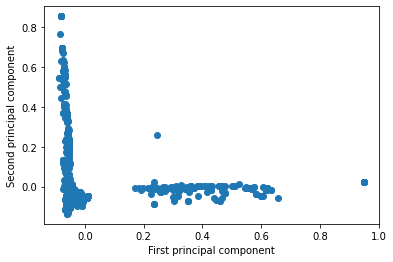

In [30]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1, principalDf.PC2)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")

In [31]:
pca.explained_variance_ratio_

array([0.04067977, 0.01434983])

In [32]:
full_data = full_data.set_index(principalDf.index)

## K-means clustering

In [33]:
# generate cluster centers and labels
centers, _ = kmeans(principalDf, 2)
principalDf['labels'], _ = vq(principalDf, centers)

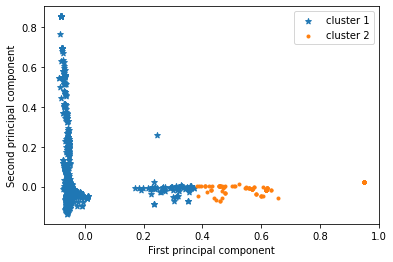

In [34]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1[principalDf.labels == 0], principalDf.PC2[principalDf.labels == 0], marker = '*', label = 'cluster 1')
ax.scatter(principalDf.PC1[principalDf.labels == 1], principalDf.PC2[principalDf.labels == 1], marker = '.', label = 'cluster 2')
#ax.scatter(principalDf.PC1, principalDf.PC2, marker = '.', label = principalDf.labels)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.legend()
plt.show()

## Spectral clustering

### Use nearest neighbors as affinity measure

In [35]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(principalDf)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


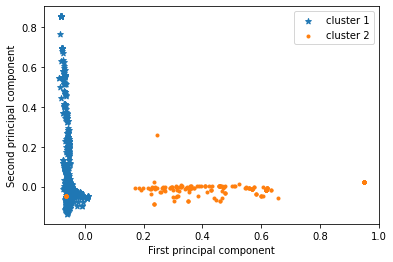

In [36]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1[labels == 0], principalDf.PC2[labels == 0], marker = '*', label = 'cluster 1')
ax.scatter(principalDf.PC1[labels == 1], principalDf.PC2[labels == 1], marker = '.', label = 'cluster 2')
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.legend()
plt.show()

### Use rbf as affinity measure

In [37]:
model = SpectralClustering(n_clusters=2, affinity='rbf',
                           assign_labels='kmeans')
labels = model.fit_predict(principalDf)

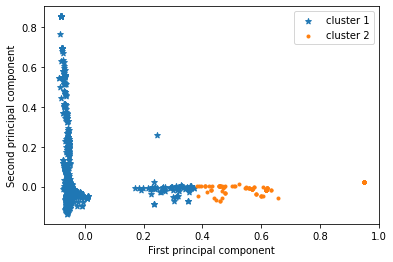

In [38]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1[labels == 0], principalDf.PC2[labels == 0], marker = '*', label = 'cluster 1')
ax.scatter(principalDf.PC1[labels == 1], principalDf.PC2[labels == 1], marker = '.', label = 'cluster 2')
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.legend()
plt.show()

### plot FI in PC plot

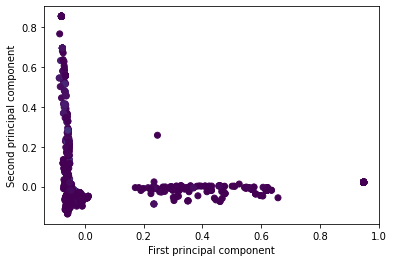

In [39]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1, principalDf.PC2, c = full_data.intensity)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
plt.show()

In [40]:
full_data.intensity.max()

34.7025481019241

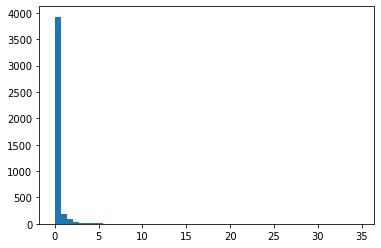

In [41]:
fig, ax = plt.subplots()
ax.hist(full_data.intensity, bins = 50)
plt.show()

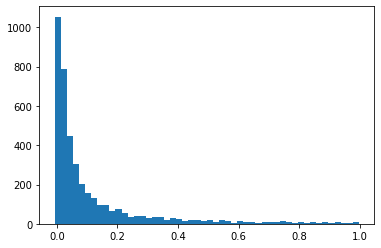

In [42]:
fig, ax = plt.subplots()
ax.hist(full_data.intensity[full_data.intensity < 1], bins = 50)
plt.show()

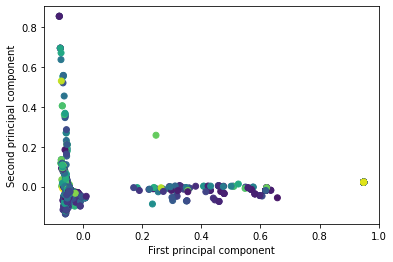

In [43]:
fig, ax = plt.subplots()
ax.scatter(principalDf.PC1.loc[full_data.intensity < 0.1], principalDf.PC2.loc[full_data.intensity < 0.1], 
           c = full_data.intensity.loc[full_data.intensity < 0.1])
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
plt.show()